## Estimation of the population standard deviation by estimating the bias using jackknife method

In [147]:
import numpy as  np
import matplotlib.pyplot as plt


In [148]:
sample = np.array([3.56, 0.69, 0.1, 1.84, 3.93, 1.25, 0.18, 1.13, 0.27, 0.5, 0.67, 0.01, 0.61, 0.82, 1.7, 0.39, 0.11, 1.2, 1.21, 0.72 ])

using natural estimator : $\hat{\sigma}=\sqrt{\hat{\sigma^2}_{MLE}}$  
we have $\hat{\sigma}=1.032$ but it is underestimated.

In [149]:
np.mean(sample), np.var(sample)**0.5

(1.0444999999999998, 1.0328478832819479)

In [150]:
def jackknife_replicate(sample, i):
    return np.var(sample[sample!=sample[i]])**0.5

In [151]:
jackknife_sd = np.mean([jackknife_replicate(sample, i) for i in range(len(sample))])
jackknife_sd

1.029515787050737

### bias-corrected jackknife estimate
$$\hat{\theta}_{(.)}=\frac{1}{n}\sum\hat{\theta}_{(i)}$$
$$\hat{\theta}_{jack}=n\hat{\theta}-(n-1)\hat{\theta}_{(.)}$$

In [152]:
corrected_sd = len(sample)*np.var(sample)**0.5-(len(sample)-1)*jackknife_sd
corrected_sd

1.0961577116749517

## Standard error of jackknife estimator

$$s.e.(\hat{\theta}_{jack})=\sqrt{\frac{n-1}{n}\sum(\hat{\theta}_{(i)}-\hat{\theta}_{(.)})^2}=\sqrt{\frac{(n-1)^2}{n}(s^2 \:for \: \hat{\theta}_{(i)})}$$

In [153]:
n = len(sample)
se_jackknife_sd = np.sqrt((n-1)**2/n*np.var([jackknife_replicate(sample, i) for i in range(len(sample))],ddof=1))
se_jackknife_sd

0.2728036850540229

## Simulation

In [154]:
population_size = 100000
sample_size = 1000


## Population

In [155]:
np.random.seed(0)
population_y = np.random.randn(population_size)
np.random.seed(0)
sample_y = np.random.choice(population_y, sample_size, replace=False)

### Population sd

In [156]:
np.sqrt(np.var(population_y))

0.9973396878273816

(array([  1.,   7.,  48., 108., 200., 249., 213., 110.,  43.,  21.]),
 array([-3.5438032 , -2.90580761, -2.26781201, -1.62981642, -0.99182082,
        -0.35382523,  0.28417036,  0.92216596,  1.56016155,  2.19815715,
         2.83615274]),
 <BarContainer object of 10 artists>)

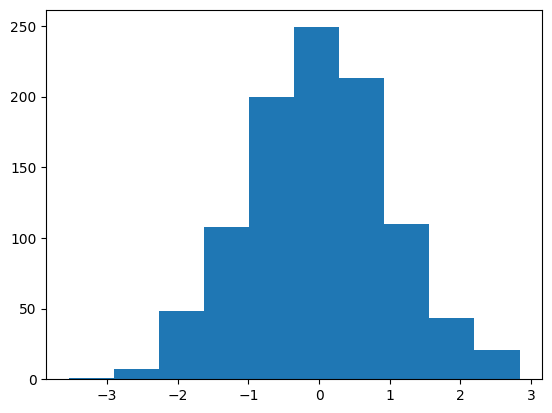

In [157]:
plt.hist(sample_y)

In [158]:
natural_estimated_sd = np.sqrt(np.var(sample_y))
natural_estimated_sd

1.0151408938520794

In [159]:
jackknife_sd = np.mean([jackknife_replicate(sample_y, i) for i in range(len(sample_y))])
jackknife_sd

1.015140139471434

In [160]:
corrected_sd = len(sample_y)*np.var(sample_y)**0.5-(len(sample_y)-1)*jackknife_sd
corrected_sd

1.015894520116717